<a href="https://colab.research.google.com/github/Kareem2168/training/blob/main/PCA_Completions_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
from google.colab import files
files.upload()

Saving Chapter3_Completions_DataSet.xlsx to Chapter3_Completions_DataSet.xlsx


{'Chapter3_Completions_DataSet.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [4]:
df=pd.read_excel('Chapter3_Completions_DataSet.xlsx')
df.describe()

,Stage Spacing,Cluster Spacing,Sand per ft (# per ft),Water per ft (gal per ft)
count,144.000000,144.000000,144.000000,144.000000
mean,197.908333,39.713194,2949.275000,57.986111
std,28.411963,5.702597,1414.559452,37.618435
min,146.200000,26.000000,798.000000,5.000000
25%,173.400000,36.400000,1197.000000,15.000000
50%,193.800000,39.000000,3351.600000,65.000000
75%,217.600000,42.900000,4069.800000,90.000000
max,268.600000,57.200000,5506.200000,125.000000


In [16]:
df.columns

Index(['Stage Spacing', 'Cluster Spacing', 'Sand per ft (# per ft)',
       'Water per ft (gal per ft)'],
      dtype='object')

In [6]:
from sklearn.preprocessing import StandardScaler
# we can use maxmin instead of standared scaler 


In [21]:
scaler=StandardScaler()  #standardize the data 

scaler.fit(df)
scaled_features=scaler.transform(df) #here the data are transferred to array
#based on std=1 and mean=0
scaled_data=pd.DataFrame(scaled_features,columns=[df.columns])
scaled_data

,Stage Spacing,Cluster Spacing,Sand per ft (# per ft),Water per ft (gal per ft)
0,-0.865617,1.018309,-1.299677,-1.280053
1,-1.105788,-0.125501,-1.299677,-1.280053
2,-1.345959,0.332023,-1.356287,-1.280053
3,-1.466045,0.103261,-1.243066,-1.280053
4,-0.985703,1.247071,-1.299677,-1.280053
...,...,...,...,...
139,1.295924,0.103261,0.964733,1.254119
140,1.055752,0.103261,1.077953,1.654251
141,1.295924,0.103261,0.794902,1.520874
142,-0.025018,-0.811787,0.794902,0.987364


In [27]:
#now to perform PCA we import PCA from  decomposition
from sklearn.decomposition import PCA
#here we apply n principal components to the scaled features
PCA=PCA(n_components=2)
PCA.fit(scaled_data)
PCA_transform=PCA.transform(scaled_data)
PCA_transform

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array([[-2.20401503,  0.49230415],
       [-2.01847823, -0.65257072],
       [-2.3001967 , -0.3263588 ],
       [-2.23481144, -0.5804819 ],
       [-2.32844843,  0.65610591],
       [-2.01570154,  1.4935046 ],
       [-2.37840516,  0.05716489],
       [-2.17148144,  0.23678942],
       [-2.26829929, -1.09568622],
       [-2.12311515, -0.44880128],
       [-2.10815144,  1.05406075],
       [-2.26338126,  0.14507647],
       [-2.15628491, -0.70709925],
       [-2.56671864, -0.94403556],
       [-2.14337646,  1.8671572 ],
       [-2.20456595,  2.68214851],
       [-2.14710823,  1.48793811],
       [-2.12858409,  0.50028039],
       [-1.84194759,  1.41483116],
       [-2.2819054 ,  1.13273419],
       [-1.85627512,  0.42578182],
       [-2.1444168 ,  0.93035638],
       [-2.7093581 ,  0.46433027],
       [-1.75505189,  0.09969964],
       [-2.16482624,  0.14925134],
       [-1.89039914, -0.60323518],
       [-1.9877679 ,  0.25413354],
       [-2.10878761,  0.54024806],
       [-2.07958163,

Text(0, 0.5, 'Second Principal Component')

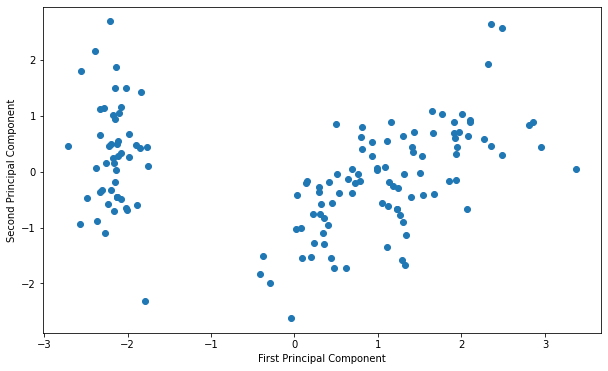

In [32]:
#let us plot these components
plt.figure(figsize=(10,6))
plt.scatter(PCA_transform[:, 0], PCA_transform[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [38]:
#to see the variables that have the highest impact on the components
components=pd.DataFrame(PCA.components_, columns=[df.columns])
#the scores will range between -1 & 1 
components
#principal component is shown as row

,Stage Spacing,Cluster Spacing,Sand per ft (# per ft),Water per ft (gal per ft)
0,0.519427,-0.271276,0.580313,0.565545
1,0.387659,0.919532,0.024583,0.059802


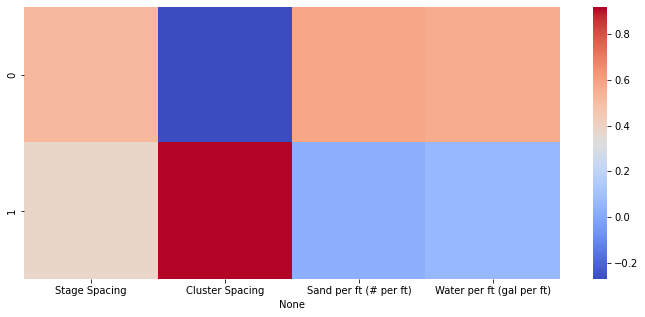

In [37]:
#we can visualize this using heatmaps
plt.figure(figsize=(12,5))
sns.heatmap(components, cmap='coolwarm')

#heatmaps are used to find the relationship between correlation of various features and the components


In [40]:
#save the file as csv for later use 
PCA_csv=pd.DataFrame(PCA_transform, columns=['First Principal Component', 'Second Principal Component'])
PCA_csv.to_csv('Two Principal Components.csv')